<a href="https://colab.research.google.com/github/arobiddin/data_scince_ls_works/blob/main/05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

# 1.Faoliyatni o'rganish.
1.1 Jarayonni o'rganamiz.
Berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash, ya'ni berilgan qilymatga yaqin qiymat topuvchi(bashorat qiluvchi) model tuzish.

1.2 Analitik yondashuv.
1)Supervised learning - sababi bizda ma'lumotlarda label (yorliq) mavjud. Bu hududdadi median narx. Biz ham aynan shu narxni bashorat qilmoqchimiz.
2)Regressiya - "Bashorat" (prognoz) dedikmi demak bu regressia algoritmlari yordamida hal qilinadi
3)Offline - sababi ma'lumotlar bizga avvaldan bir marta berilgan. Doimiy ma'lumotlar oqimi yo'q. Offline bajarish imkoni bor lekin qulaylik uchun online bajaryapman.

# Ma'lumotlarni o'rganish

In [3]:
sum(df.duplicated())

700

In [4]:
df = df.drop_duplicates() # Takrorlangan qiymatlarni o'chirib tashlaymiz.


In [5]:
dfx = df[df['price']=='Договорная'].index   # Nostandart qiymatlarni ham o'chirib tashlaymiz.
df.drop(dfx, inplace=True)

In [6]:
df['price'] = df['price'].astype(str).astype(int)


In [7]:
df[df['size']=='Площадьземли:1сот']['size']  # Ma'lumotlarni standart holatga keltiramiz
df.loc[5347, 'size']=100
df['size'] = df['size'].astype(str).astype(float)

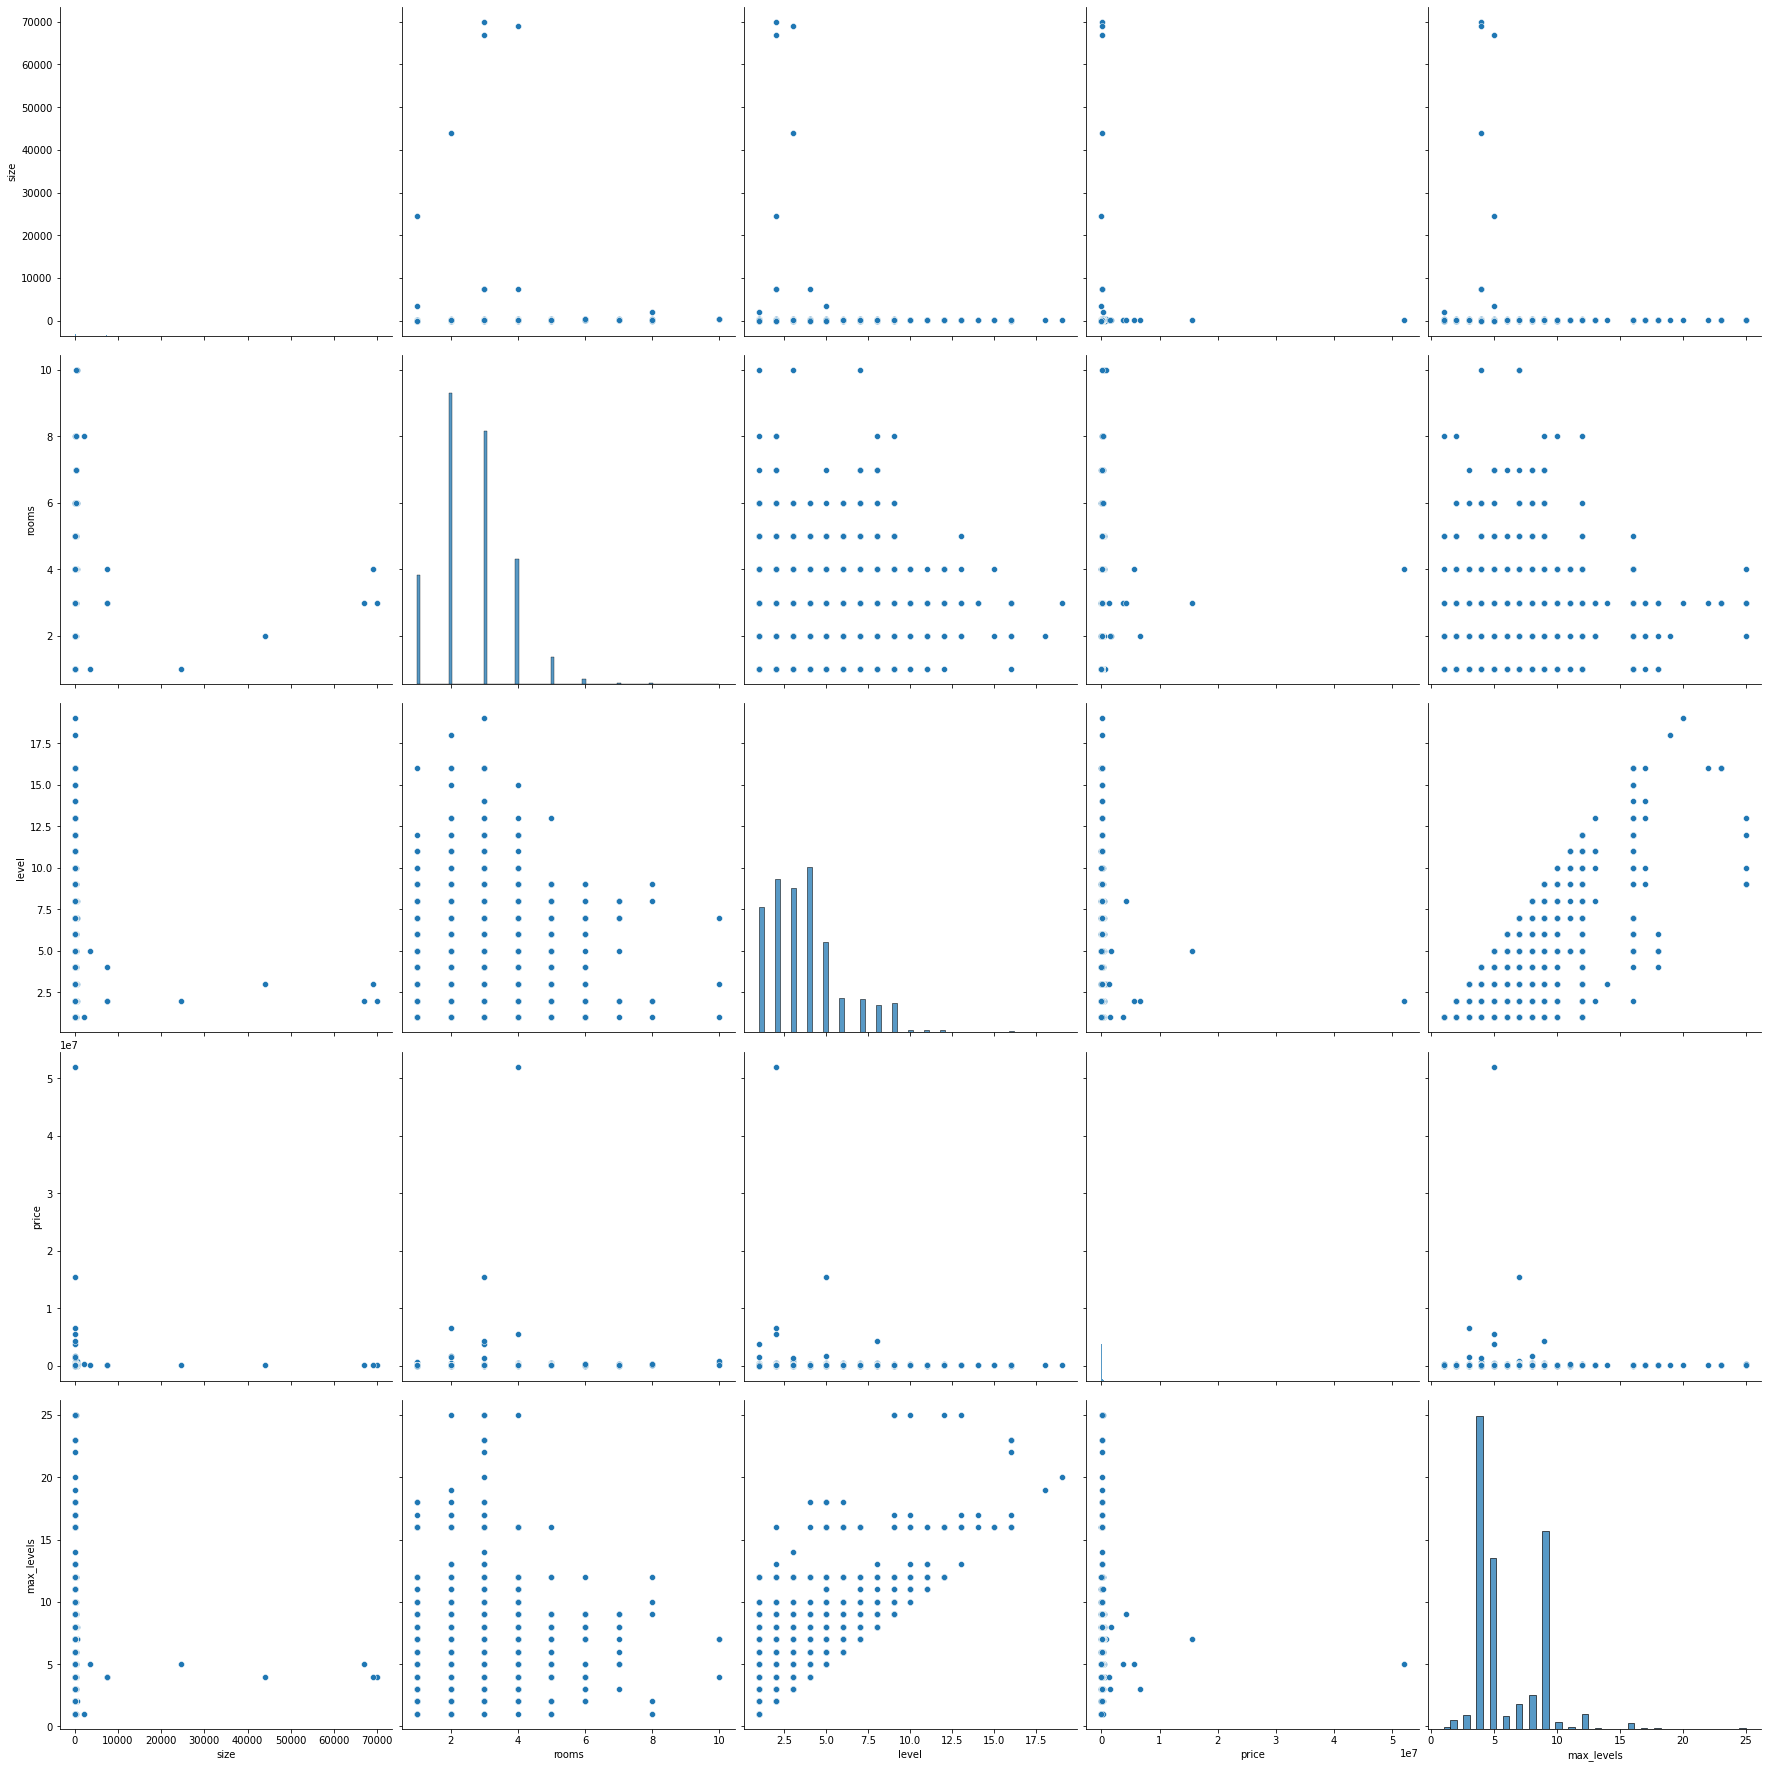

In [8]:
cols = ['size','rooms','level','price','max_levels']  #,'max_levels'
sns.pairplot(df[cols], height=5)
plt.show()

In [9]:
df[df['size']>500]

,location,district,rooms,size,level,max_levels,price
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.0,2,5,24500
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.0,2,4,76000
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.0,5,5,25000
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.0,3,4,44000
4615,"город Ташкент, Олмазорский район, Метро Тынчлик",Олмазорский,4,69000.0,3,4,69000
4784,"город Ташкент, Мирабадский район, Массив Куйлюк1",Мирабадский,3,7359.0,2,4,46500
5456,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,3,67000.0,2,5,67000
7043,"город Ташкент, Олмазорский район, Олмазорский ...",Олмазорский,4,7407.0,4,4,44000
7421,"город Ташкент, Юнусабадский район, Хасанбой",Юнусабадский,8,2100.0,1,1,265000


In [10]:
df.loc[[981,2268,2547,2662,3089,4615,4784,5456,7043,7421], 'size'] = [73.59,24.5,70,34.48,44,69,73.59,67,74.07,210]

In [11]:
# Grafik analizizdan chiqarilgan xulosalar asosida qiymatlarni normal holatga keltiramiz.
df = df[(df['size']>10) & (df['price']>4000) & (df['price']<=115_000)] 

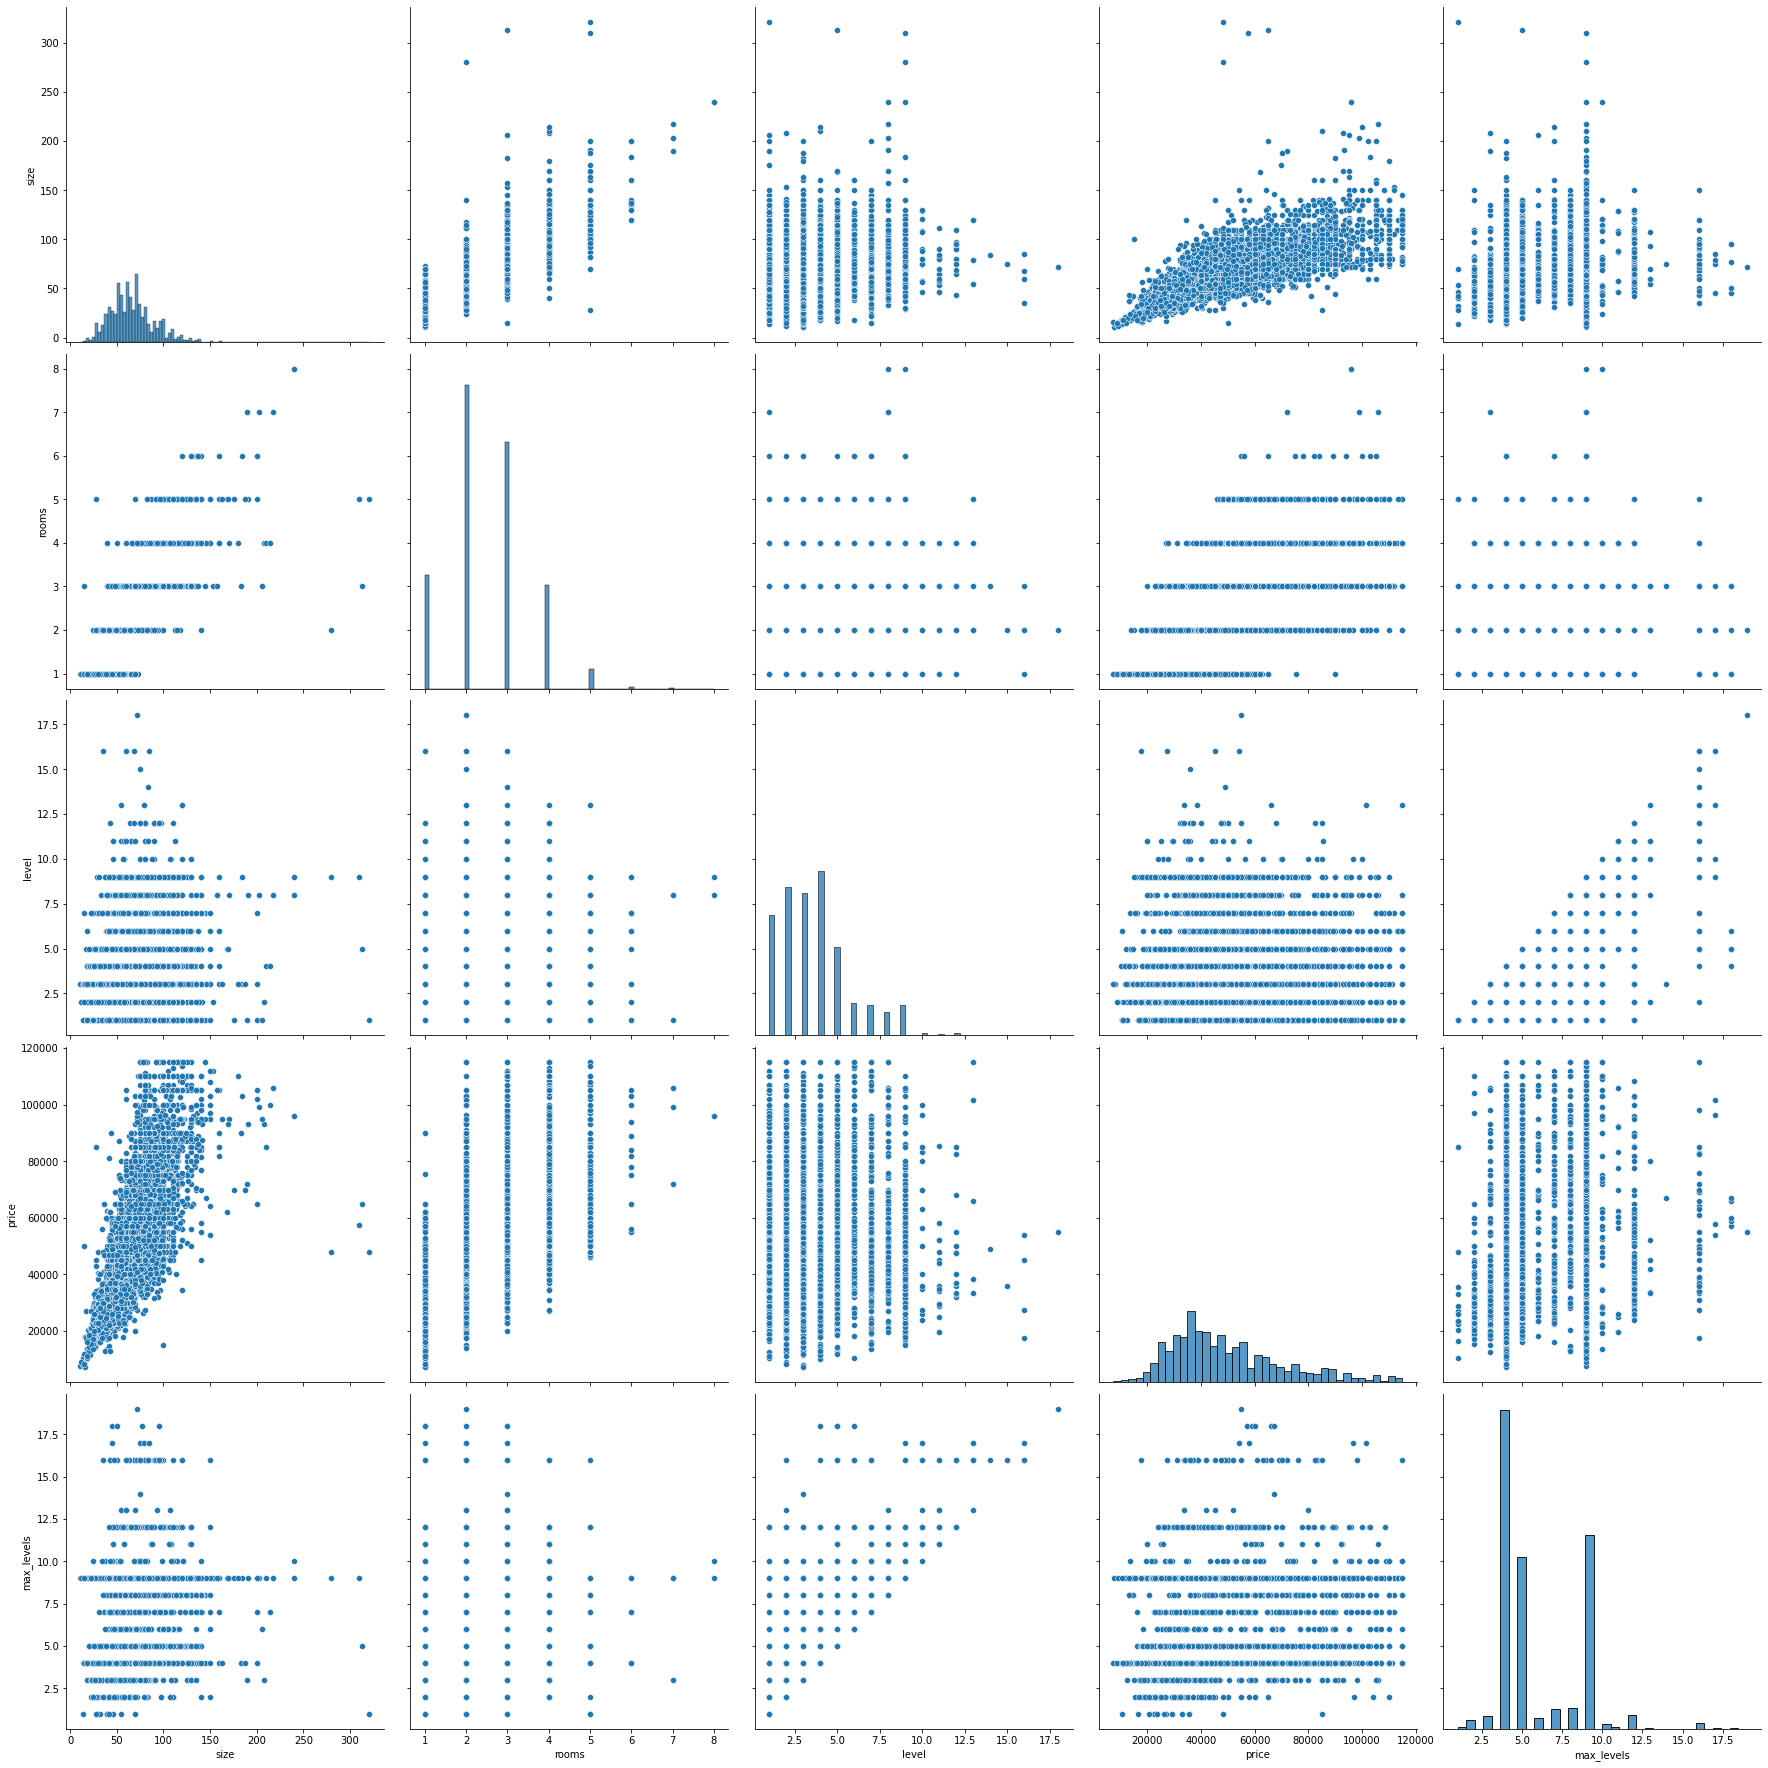

In [12]:
cols = ['size','rooms','level','price','max_levels']  #,'max_levels'
sns.pairplot(df[cols], height=5)
plt.show()

Grafik analizdan ayon bo'ldiki yuqori qiymatli uylar, ya'ni xatolik tufayli u yoki bu ko'rsatkichlari noto'g'ri kiritilgan uylar yaxshi model yaratishga imkon yaratmaydi ekan. Ularni imkon qadar to'g'riladik va qolganlaridan qutuldik.


In [13]:
# Grafik analizdan ayon bo'ldiki yuqori qiymatli uylar modelni yaratishga imkon yaratmaydi ekan.
df = df[df['size']<200]
indx = [6055, 2794,  2104, 1042, 7407, 5613, 2591, 4462]
df.drop(index=indx, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


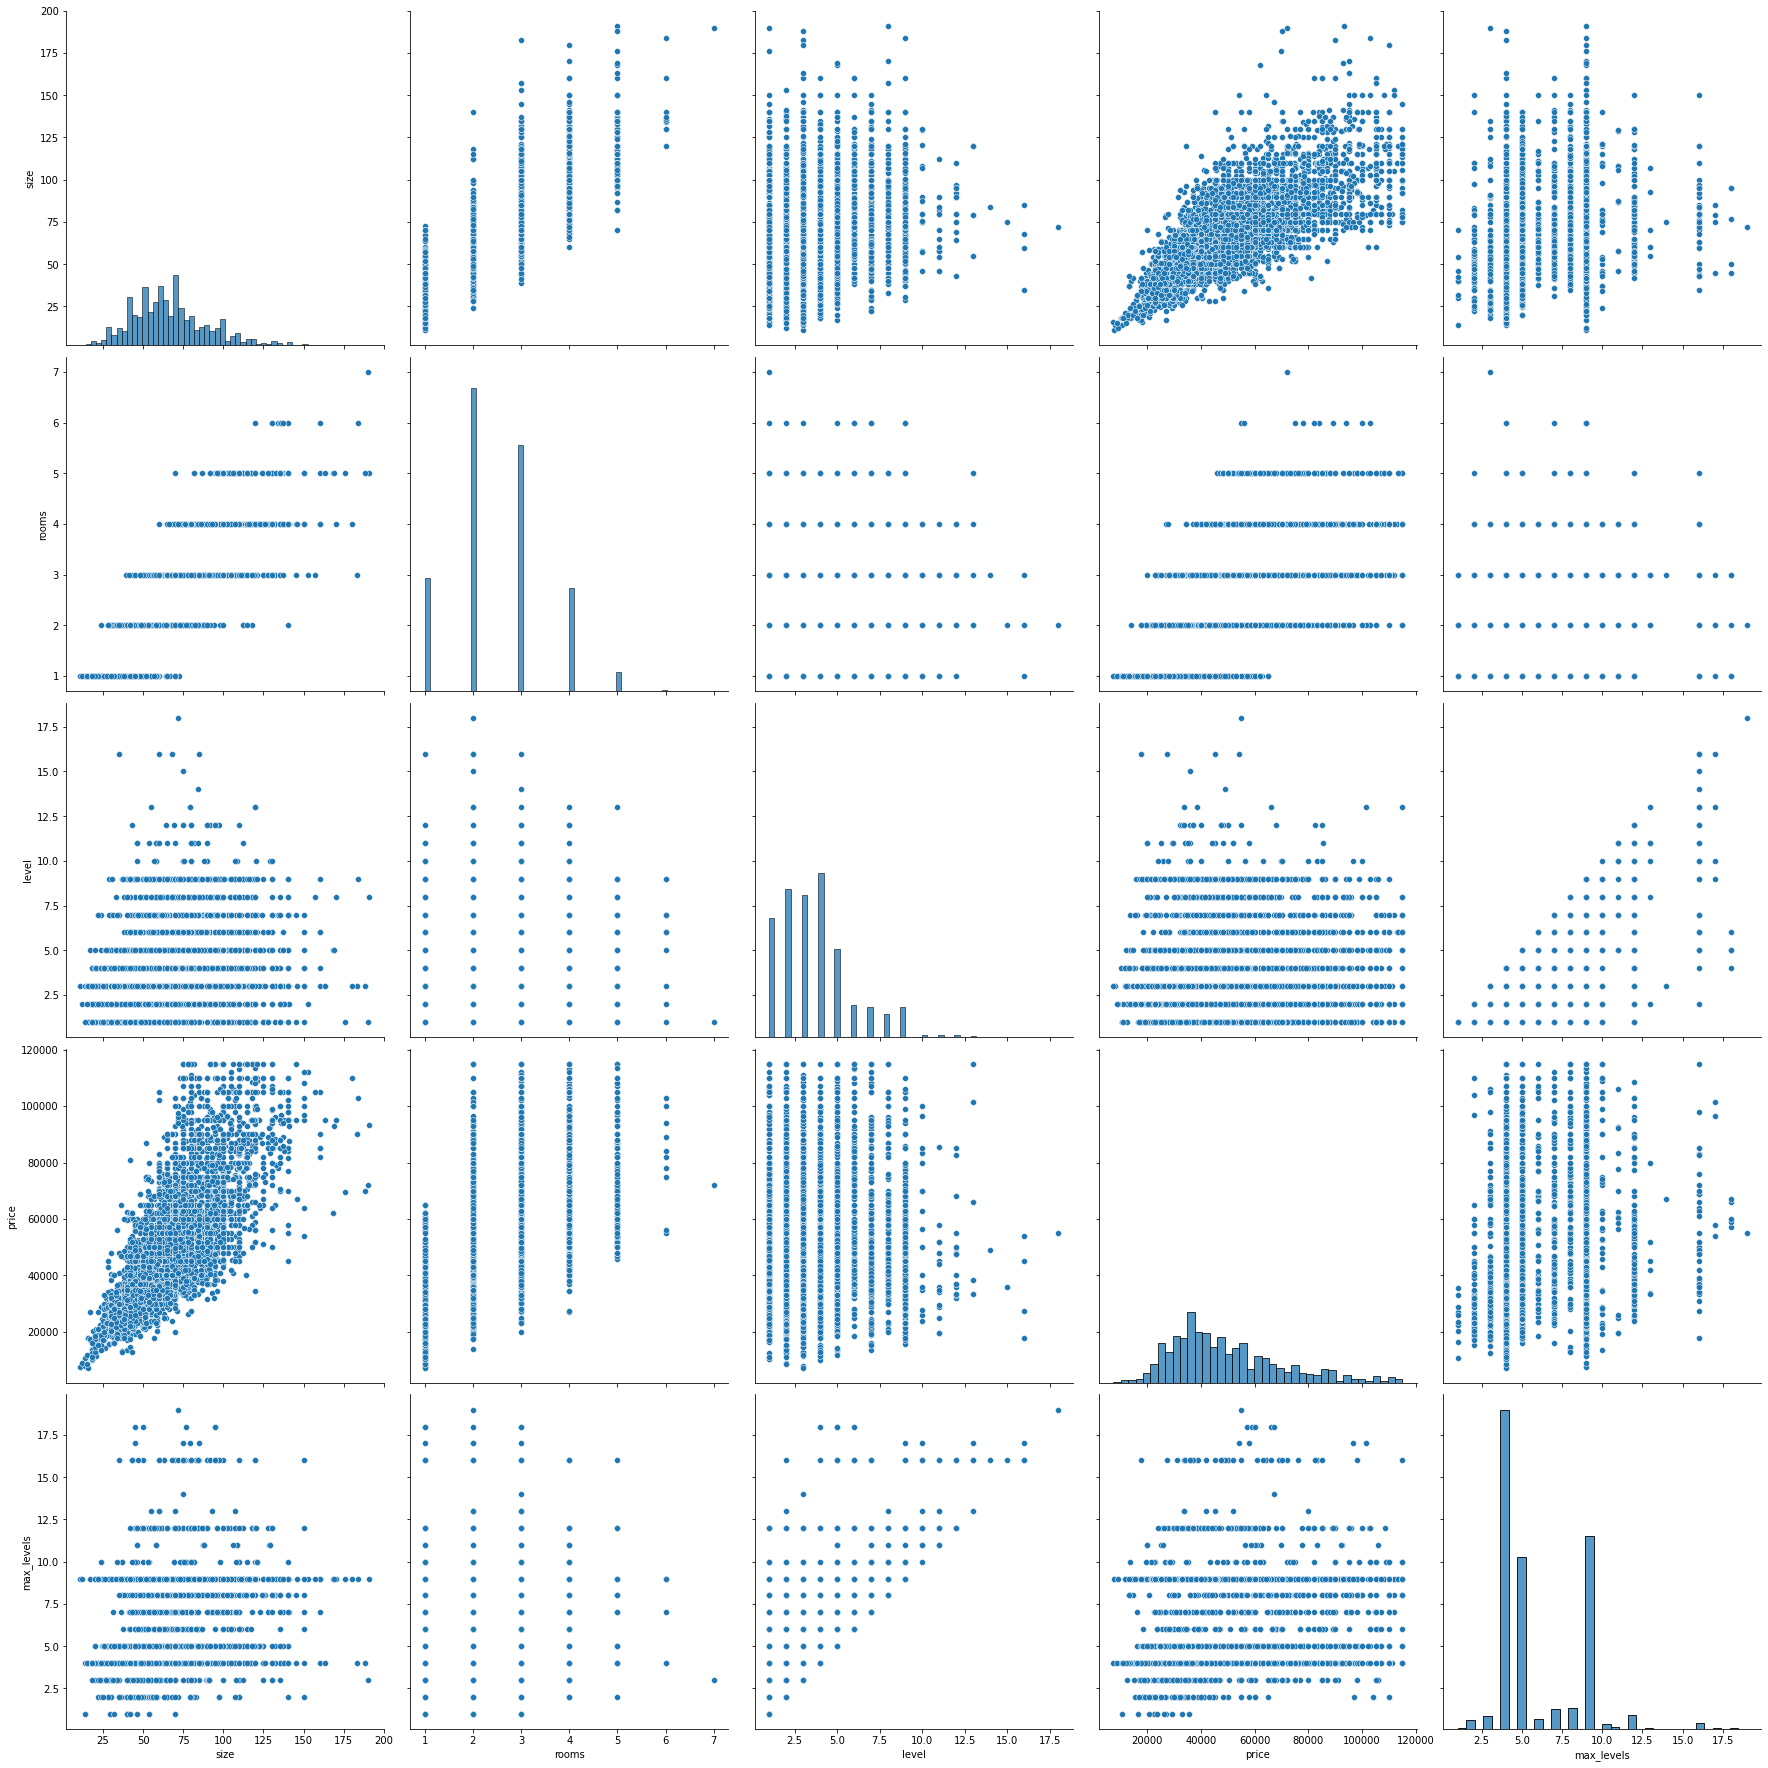

In [14]:
cols = ['size','rooms','level','price','max_levels']  #,'max_levels'
sns.pairplot(df[cols], height=5)
plt.show()

Uylarni baholashda asosan tumanlarga e'tibor qaratildi chunki ma'lumotlar oz. Ma'lumotlar ko'paygan sari uy manzillari bilan ishlash ehtiyoji ko'payadi.  


In [15]:
df = df.drop('location', axis=1)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000
1,Яккасарайский,2,52.0,4,5,56000
2,Чиланзарский,2,42.0,4,4,37000
3,Чиланзарский,3,65.0,1,4,49500
4,Чиланзарский,3,70.0,3,5,55000


In [16]:
df.describe()

,rooms,size,level,max_levels,price
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,2.510823,66.688530,3.681578,5.929774,49464.343114
std,0.984527,23.745218,2.206600,2.529088,20983.223921
min,1.000000,11.000000,1.000000,1.000000,7300.000000
25%,2.000000,50.000000,2.000000,4.000000,34500.000000
50%,2.000000,65.000000,3.000000,5.000000,45000.000000
75%,3.000000,80.000000,5.000000,9.000000,60000.000000
max,7.000000,191.000000,18.000000,19.000000,115000.000000


In [17]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
size          0.760783
rooms         0.636148
max_levels    0.256170
level         0.094577
dtype: float64

## 3. Ma'lumotlarni Machine Learning uchun tayyorlash

## Ma'lumotlarni train & testga ajratamiz

In [18]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=71)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop('district', axis=1)
X_num

,rooms,size,level,max_levels
6812,3,58.0,1,7
2357,2,60.0,6,9
2757,2,64.0,4,5
186,3,80.0,1,4
3636,3,86.0,2,4
...,...,...,...,...
1456,2,58.0,3,9
1768,2,46.0,2,4
6247,2,50.0,1,4
3564,2,62.0,3,9


## Pipeline quramiz

In [19]:
# bizga kerak ustunlar indekslari
rooms_ix,	size_ix,	max_level_ix,	= 0, 1, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_SLR = True):
        self.add_SLR = add_SLR
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        size_room = X[:, size_ix] / X[:, rooms_ix] 
        if self.add_SLR: # price_level ustuni ixtiyoriy bo'ladi
            size_level = X[:, size_ix] / X[:, max_level_ix] 
            return np.c_[X, size_room, size_level] 
        else:
            return np.c_[X, size_room] 


## Sonli ustunlar uchun 

In [20]:
num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder(add_SLR = True)),
          ('std_scaler', StandardScaler())             
])

## Matnli ustunlar uchun va full Pipeline

In [21]:
num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [22]:
print(X_train.shape, y.shape)
X_prepared = full_pipeline.fit_transform(X_train)
print(X_prepared.shape, y.shape)

(4989, 5) (4989,)
(4989, 7) (4989,)


In [23]:
X_prepared[0:5,:]

array([[ 0.49662838, -0.36503875, -1.2177452 ,  0.423287  , -1.27553947,
        -0.74052232,  4.        ],
       [-0.52048122, -0.28113589,  1.05052347,  1.21317998,  0.32967437,
        -1.01974114,  2.        ],
       [-0.52048122, -0.11333016,  0.143216  , -0.36660597,  0.63065197,
         0.03800546,  2.        ],
       [ 0.49662838,  0.55789273, -1.2177452 , -0.76155245, -0.17195495,
         1.279708  , 11.        ],
       [ 0.49662838,  0.80960131, -0.76409147, -0.76155245,  0.12902264,
         1.53839603,  2.        ]])

In [24]:
print(X_prepared.shape, y.shape)
# ma'lumotlardagi nostandart qiymatlarni aniqlaymiz
IsoFt = IsolationForest(contamination=0.1)
yhat = IsoFt.fit_predict(X_prepared)
# barcha standart qiymatlarni tanlash
mask = yhat != -1
X_prepared, y,  = X_prepared[mask, :], y[mask]
print(X_prepared.shape, y.shape)

(4989, 7) (4989,)
(4490, 7) (4490,)


## Machine Learning

In [25]:
LR_model = LinearRegression()

In [26]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [27]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

## Modelni baholaymiz

In [28]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels
3249,Мирабадский,3,75.0,7,9
3736,Юнусабадский,1,44.0,2,7
1081,Яшнободский,2,65.0,2,7
3344,Учтепинский,2,46.0,4,4
4229,Мирзо-Улугбекский,2,45.0,3,7


In [29]:
test_label = y.loc[test_data.index]
test_label

3249    115000
3736     60000
1081     65999
3344     32500
4229     45000
Name: price, dtype: int64

In [30]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 0.49662838,  0.34813557,  1.5041772 ,  1.21317998, -0.42276962,
        -0.73231   ,  1.        ],
       [-1.53759081, -0.95235878, -0.76409147,  0.423287  ,  2.43651755,
        -1.08543969,  8.        ],
       [-0.52048122, -0.07137873, -0.76409147,  0.423287  ,  0.70589637,
        -0.56806363, 11.        ],
       [-0.52048122, -0.86845592,  0.143216  , -0.76155245, -0.72374721,
        -0.18619083,  5.        ],
       [-0.52048122, -0.91040735, -0.31043773,  0.423287  , -0.79899161,
        -1.06080273,  2.        ]])

In [31]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([54832.71614479, 33961.51986286, 50310.41991657, 33497.81727853,
       36934.13393462])

In [32]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
3249,54832.716145,115000
3736,33961.519863,60000
1081,50310.419917,65999
3344,33497.817279,32500
4229,36934.133935,45000


In [33]:
test_set

,district,rooms,size,level,max_levels,price
7295,Юнусабадский,4,95.0,3,9,62000
4338,Мирабадский,4,122.0,3,5,65000
1416,Учтепинский,3,65.0,4,4,34000
1506,Мирзо-Улугбекский,5,125.0,5,5,107000
4178,Олмазорский,4,100.0,9,9,62500
...,...,...,...,...,...,...
5600,Чиланзарский,2,50.0,4,4,33500
767,Мирзо-Улугбекский,3,85.0,4,4,83000
5867,Мирзо-Улугбекский,3,65.0,4,5,42000
1082,Чиланзарский,3,62.0,3,6,68000


In [34]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
7295,Юнусабадский,4,95.0,3,9
4338,Мирабадский,4,122.0,3,5
1416,Учтепинский,3,65.0,4,4
1506,Мирзо-Улугбекский,5,125.0,5,5
4178,Олмазорский,4,100.0,9,9
...,...,...,...,...,...
5600,Чиланзарский,2,50.0,4,4
767,Мирзо-Улугбекский,3,85.0,4,4
5867,Мирзо-Улугбекский,3,65.0,4,5
1082,Чиланзарский,3,62.0,3,6


In [35]:
y_test = test_set['price'].copy()
y_test

7295     62000
4338     65000
1416     34000
1506    107000
4178     62500
         ...  
5600     33500
767      83000
5867     42000
1082     68000
548      38500
Name: price, Length: 1248, dtype: int64

In [36]:
X_test_prepared = full_pipeline.transform(X_test)

In [37]:
print(X_test.shape, y_test.shape)
yhat1 = IsoFt.fit_predict(X_test_prepared)
# barcha standart qiymatlarni tanlash
mask1 = yhat1 != -1
X_test_prepared, y_test,  = X_test_prepared[mask1, :], y_test[mask1]
print(X_test_prepared.shape, y_test.shape)

(1248, 5) (1248,)
(1123, 7) (1123,)


In [38]:
y_predicted = LR_model.predict(X_test_prepared)

In [39]:
mae = mean_absolute_error(y_test, y_predicted)
print("MAE=",mae)

MAE= 9546.352236390758


In [40]:
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [41]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

10918.033742500129


In [42]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [44]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [10824.0113854  12812.78433238 12097.76384104 11429.57669371
 11113.56883718]
Mean: 11655.54101794213
Std.dev: 717.0785681393246


## Joblib yordamida modelimizni saqlaymiz

In [45]:
filename = 'RF_model.jbl' # faylga istalgan nom beramiz
joblib.dump(RF_model, filename)

['RF_model.jbl']

In [46]:
model = joblib.load(filename)
filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename)

['pipeline.jbl']